In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from KnnAC.knnAC import KNearNeighbors as knnAC
from KnnAC import utilsAC

In [115]:
def knn_pipeline(data_x, data_y):
    train_x, train_y, test_x, test_y = utilsAC.splitTrainTest(data_x, data_y, train_ratio=0.7)
    train_x, train_min, train_max = utilsAC.normMinMax(train_x, mode='train')
    test_x = utilsAC.normMinMax(test_x, train_min=train_min, train_max=train_max, mode='test')

    my_knn = knnAC(2)
    my_knn.fit(train_x)
    pred = my_knn.predict(test_x)

    if len(data_y.unique()) == 2:
        print(f'Accuracy of prediction: {utilsAC.get_performance_measure(test_y, pred)["acc"]}')
        print(f'Accuracy of inverted prediction: {utilsAC.get_performance_measure(test_y, [1 - p for p in pred])["acc"]}')

    if data_x.shape[1] == 2:
        pred_whole = my_knn.predict(data_x)
        for i in np.unique(pred_whole):
            plt.scatter(data_x[pred_whole == i][0], data_x[pred_whole == i][1], label=f'Class {i}')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
        plt.title('KNN Classification')
        plt.show()
    elif data_x.shape[1] == 3:
        pred_whole = my_knn.predict(data_x)
        ax = plt.axes(projection='3d')
        for i in np.unique(pred_whole):
            ax.scatter3D(data_x[pred_whole == i][0], data_x[pred_whole == i][1], data_x[pred_whole == i][1], label=f'Class {i}')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('X3')
        plt.legend()
        plt.title('KNN Classification')
        plt.show()
    else:
        print('Cannot plot data with more than 3 dimensions')

### Data 1

In [116]:
data1 = pd.read_csv('data/data1.csv', header=None)
print(data1.shape)
data1.head()

(400, 4)


,0,1,2,3
0,-5.21460,7.0880,6.72920,1
1,-0.42176,8.4266,7.89610,1
2,-6.13460,5.6864,6.08860,1
3,6.21260,8.3078,2.36230,1
4,6.34460,7.6650,0.53239,1


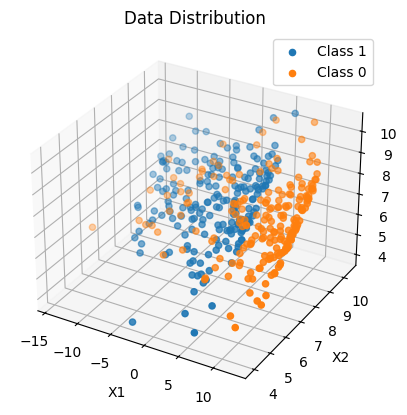

In [117]:
ax = plt.axes(projection='3d')
for i in data1[3].unique():
    ax.scatter3D(data1[data1[3] == i][0], data1[data1[3] == i][1], data1[data1[3] == i][1], label=f'Class {i}')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Data Distribution')
plt.legend()
plt.show()

In [118]:
data1_x = data1.iloc[:, :-1]
data1_y = data1.iloc[:, -1]
print(data1_y.value_counts())

3
1    200
0    200
Name: count, dtype: int64


Accuracy of prediction: 0.175
Accuracy of inverted prediction: 0.825


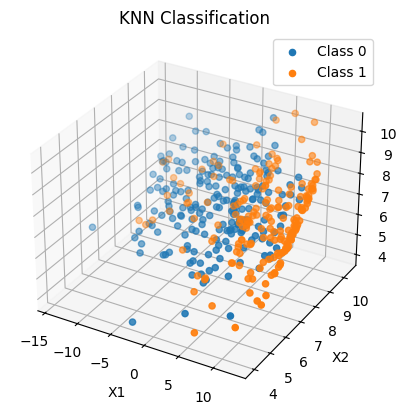

In [119]:
knn_pipeline(data1_x, data1_y)

### Data 2 - Breast Cancer Wisconsin (Diagnostic) Dataset

In [120]:
data2 = pd.read_csv('data/wdbc_dataset/wdbc.data', header=None)
print(data2.shape)
data2.head()

(569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [121]:
data2_x = data2.iloc[:, 2:]
data2_y = data2.iloc[:, 1].map({'M': 0, 'B': 1})
print(data2_y.value_counts())

1
1    357
0    212
Name: count, dtype: int64


In [122]:
knn_pipeline(data2_x, data2_y)

Accuracy of prediction: 0.07017543859649122
Accuracy of inverted prediction: 0.9298245614035088
Cannot plot data with more than 3 dimensions
